### Purpose: 
Missing Value Ratio selection helps you identify features that have a high proportion of missing values in your dataset.
### Useful for: 
#### Features with excessive missing values can:
##### Introduce bias into your model
##### Reduce the amount of usable data
##### Make model training more difficult
##### Potentially lead to inaccurate predictions

### How it Works

##### Calculate Missing Value Ratio: For each feature, calculate the ratio of missing values to the total number of samples:
###### Missing Value Ratio = (Number of Missing Values) / (Total Number of Samples)
##### Set a Threshold: Choose a threshold value (e.g., 0.5, 0.75). This indicates the maximum acceptable ratio of missing values you're willing to tolerate.

##### Filter Features:  Remove any feature whose Missing Value Ratio exceeds the threshold.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [3]:
threshold = 0.5  # Set your threshold here (e.g., 50% missing values)

# Calculate missing value ratios
missing_ratios = df.isnull().mean()

In [5]:
selected_features = missing_ratios[missing_ratios <= threshold].index.tolist()
dropped_features = missing_ratios[missing_ratios > threshold].index.tolist()

# Create a new DataFrame with the selected features
df_selected = df[selected_features]

print("Dropped columns:")
print(set(df.columns) - set(selected_features))

Dropped columns:
set()


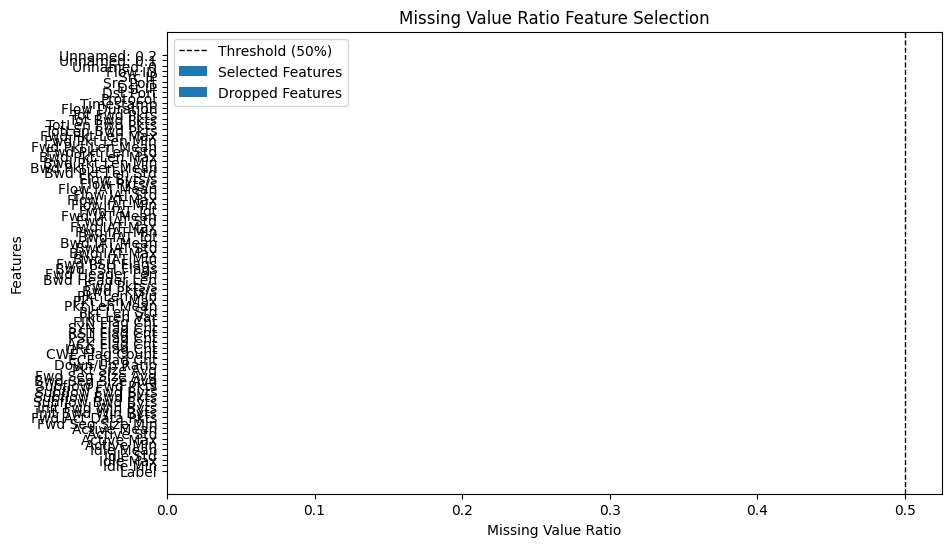

In [8]:
# Plotting
plt.figure(figsize=(10, 6))

plt.barh(selected_features, missing_ratios[selected_features], label='Selected Features')
plt.barh(dropped_features, missing_ratios[dropped_features], label='Dropped Features', color='red')

plt.axvline(x=threshold, color='black', linestyle='dashed', linewidth=1, label=f'Threshold ({threshold:.0%})')
plt.xlabel('Missing Value Ratio')
plt.ylabel('Features')
plt.title('Missing Value Ratio Feature Selection')
plt.legend()
plt.gca().invert_yaxis()  # To show the features in descending order of missing values
plt.show()

In [9]:
df_selected.to_csv("MissingValueRatio.csv")